In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [115]:
# loading the data into dataframe
data = pd.read_csv('netflix.csv')
df = pd.DataFrame(data)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# info() function will give the data type and null values information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [47]:
# describe() function gives the statistical information of the dataframe. 
# Here describe is used on the whole dataframe. We can use describe() on a particular column as well.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [48]:
# shape gives the number of rows and columns in a tuple format. Here, 8807 is number of rows and there are 12 columns
df.shape

(8807, 12)

In [116]:
# From the dataset, it is observed that the duration value is present in rating column for three rows.
# Hence, we are assigning those values to the duration column and then verifying the result.
df['duration']= df['duration'].fillna(df['rating'])
df.loc[df['title'].str.contains('Louis C.K.')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [122]:
# Now to these rating values where duration was present instead of rating, assign the value-Unknown Rating.
df['rating'] = np.where(df['title'].str.contains('Louis C.K.') & (df['rating'].str.contains('min')), 'Unknown Rating', df['rating'])
df.loc[df['title'].str.contains('Louis C.K.')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown Rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unknown Rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unknown Rating,66 min,Movies,The comic puts his trademark hilarious/thought...


In [123]:
# Filling the null values:
# For date_added column, using the mostly occured date to fill for null values, since there are only 10 missing values.

df['cast'] = df['cast'].fillna('Unknown Actor')
df['director'] = df['director'].fillna('Unknown Director')
df['country'] = df['country'].fillna('Unknown Country')
df['rating'] = df['rating'].fillna('Unknown Rating')
df['date_added'] = pd.to_datetime(df['date_added']).fillna(df['date_added'].mode()[0])
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [124]:
# Below result shows that all the null values have been handled. Now, we can go ahead with unnesting of the data.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<!-- UNNESTING THE DATA -->

In [125]:
# checking if the cast column contains multiple comma separated values
df['cast'].str.contains(',')

0       False
1        True
2        True
3       False
4        True
        ...  
8802     True
8803    False
8804     True
8805     True
8806     True
Name: cast, Length: 8807, dtype: bool

In [126]:
# getting the subset of dataframe for unnesting cast
df_cast = df[['title','cast']]
df_cast.shape

(8807, 2)

In [127]:
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,Unknown Actor
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,Unknown Actor
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [131]:
# Using this avoid chained assignement fallse positive warning
pd.options.mode.chained_assignment = None

In [134]:
# splitting the cast column to get the list of comma separated values
df_cast['cast_split'] =df_cast['cast'].apply(lambda x: str(x).split(', '))
df_cast.head()

,title,cast,cast_split
0,Dick Johnson Is Dead,Unknown Actor,[Unknown Actor]
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,Jailbirds New Orleans,Unknown Actor,[Unknown Actor]
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."


In [135]:
# Using explode() function to create separate rows for each value present in the list of cast_split
df_cast = df_cast.explode('cast_split')
df_cast.head(10)

,title,cast,cast_split
0,Dick Johnson Is Dead,Unknown Actor,Unknown Actor
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Dillon Windvogel
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Natasha Thahane
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Arno Greeff
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Xolile Tshabalala
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Getmore Sithole


In [136]:
df_cast.shape

(64951, 3)

In [138]:
# splitting country column and then exploding it to create multiple rows
df_country = df[['title','country']]
df_country['country_split'] = df['country'].str.split(', ')
df_country = df_country.explode('country_split')
df_country.head(20)

,title,country,country_split
0,Dick Johnson Is Dead,United States,United States
1,Blood & Water,South Africa,South Africa
2,Ganglands,Unknown Country,Unknown Country
3,Jailbirds New Orleans,Unknown Country,Unknown Country
4,Kota Factory,India,India
5,Midnight Mass,Unknown Country,Unknown Country
6,My Little Pony: A New Generation,Unknown Country,Unknown Country
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",United States
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",Ghana
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",Burkina Faso


In [139]:
df_country.shape

(10845, 3)

In [140]:
# splitting 'listed_in' column and then exploding it to create multiple rows
df_listed = df[['title','listed_in']]
df_listed['listed_in_split'] = df['listed_in'].str.split(', ')
df_listed = df_listed.explode('listed_in_split')
df_listed.head()

,title,listed_in,listed_in_split
0,Dick Johnson Is Dead,Documentaries,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows


In [141]:
df_listed.shape

(19323, 3)

In [143]:
# Merging the data to get the new data frame with all the generated columns
df_netflix = pd.merge(df, df_cast, on='title')
df_netflix.head()

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y,cast_split
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Actor,Unknown Actor
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane
4,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba


In [144]:
# merging the data for country and listed_in columns
df_netflix = pd.merge(df_netflix, df_country, on='title')
df_netflix = pd.merge(df_netflix, df_listed, on ='title')

In [145]:
# verifying the data for one of the show
df_netflix.loc[df_netflix['title']=='Sankofa', ['show_id','title','director','cast_split','country_split','listed_in_split']].head(20)

,show_id,title,director,cast_split,country_split,listed_in_split
169,s8,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas
170,s8,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies
171,s8,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies
172,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,Dramas
173,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,Independent Movies
174,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,International Movies
175,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,Dramas
176,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,Independent Movies
177,s8,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,International Movies
178,s8,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,Dramas


In [146]:
df_netflix.shape

(186325, 18)

In [147]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast_x', 'country_x',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in_x',
       'description', 'cast_y', 'cast_split', 'country_y', 'country_split',
       'listed_in_y', 'listed_in_split'],
      dtype='object')

In [148]:
# dropping the columns which are duplicated during the merge
df_netflix.drop(columns=['cast_x','country_x','listed_in_x','cast_y','country_y','listed_in_y'], inplace= True)
df_netflix.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast_split,country_split,listed_in_split
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows


In [149]:
df_netflix.shape

(186325, 12)

In [150]:
df_netflix.isnull().any()

show_id            False
type               False
title              False
director           False
date_added         False
release_year       False
rating             False
duration           False
description        False
cast_split         False
country_split      False
listed_in_split    False
dtype: bool

# REQ-1: Find the counts of each categorical variable both using graphical and nongraphical analysis.

In [151]:
#1 count of type of content:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

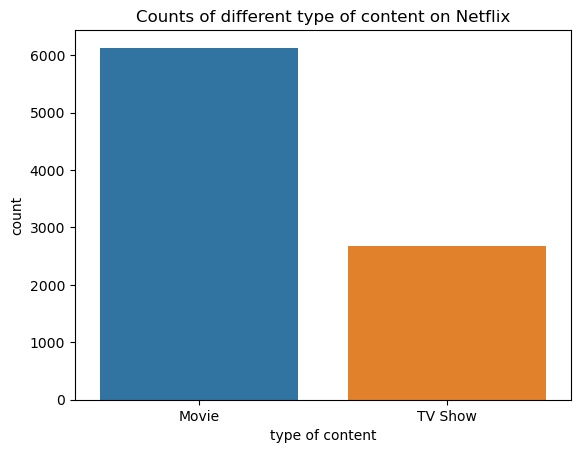

In [155]:
sns.countplot(x='type', data=df)
plt.title('Counts of different type of content on Netflix')
plt.xlabel('type of content')
plt.show()

In [153]:
#2 count of type of rating:
df['rating'].value_counts()

TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
Unknown Rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: rating, dtype: int64

<!--From the non-graphical analysis above, most of the content belongs to TV-MA type rating.-->
<!--Same is depicted from the graphical analysis below.  -->

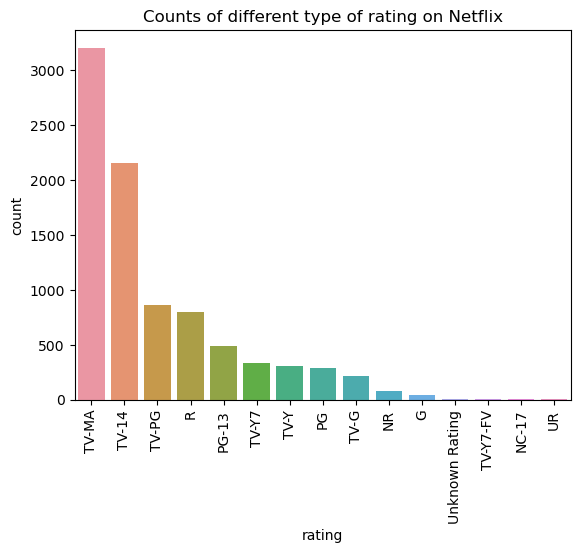

In [154]:
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Counts of different type of rating on Netflix')
plt.xticks(rotation=90)
plt.show()

In [163]:
#3 count of different genres
df_listed_in = df_netflix[['show_id','listed_in_split']]
df_listed_in= df_listed_in.drop_duplicates()
df_listed_in.head()

,show_id,listed_in_split
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
58,s3,Crime TV Shows


In [164]:
df_listed_in['listed_in_split'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

<!--From the non-graphical analysis above, most of the content is produced under International Movies genre.-->
<!--Same is depicted from the graphical analysis below.  -->

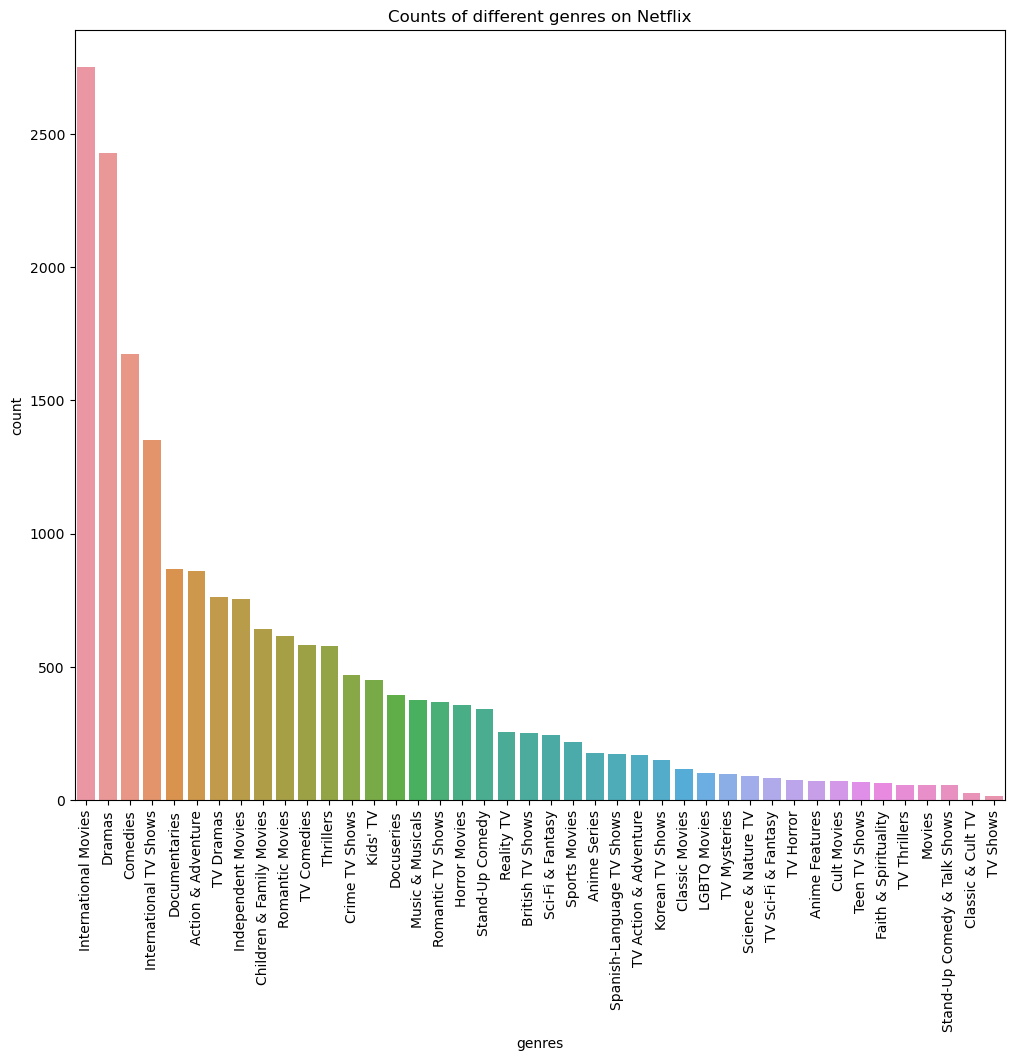

In [177]:
plt.figure(figsize=(12,10))
sns.countplot(x='listed_in_split', data=df_listed_in, order= df_listed_in['listed_in_split'].value_counts().index)
plt.title('Counts of different genres on Netflix')
plt.xlabel('genres')
plt.xticks(rotation=90)
plt.show()

# REQ-2a: Find the number of movies produced in each country and pick the top 10 countries.

In [184]:
# value_counts will sort the data in descending order. Then we are picking up top 10 indices and then data present on those indices
df_country_movie = df_netflix.loc[df_netflix['type']=='Movie',['show_id','country_split']]
df_country_movie.drop_duplicates(inplace=True, keep='first')
df_top10_index = df_country_movie['country_split'].value_counts().index[:10]
df_top10_country_movie = df_country_movie.loc[df_country_movie['country_split'].isin(df_top10_index)]
df_top10_country_movie

,show_id,country_split
0,s1,United States
159,s7,Unknown Country
169,s8,United States
178,s8,United Kingdom
181,s8,Germany
...,...,...
186157,s8800,India
186236,s8803,United States
186269,s8805,United States
186283,s8806,United States


In [190]:
df_country_movie.groupby('country_split')['show_id'].nunique().sort_values(ascending=False).head(10)

country_split
United States      2751
India               962
United Kingdom      532
Unknown Country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: show_id, dtype: int64

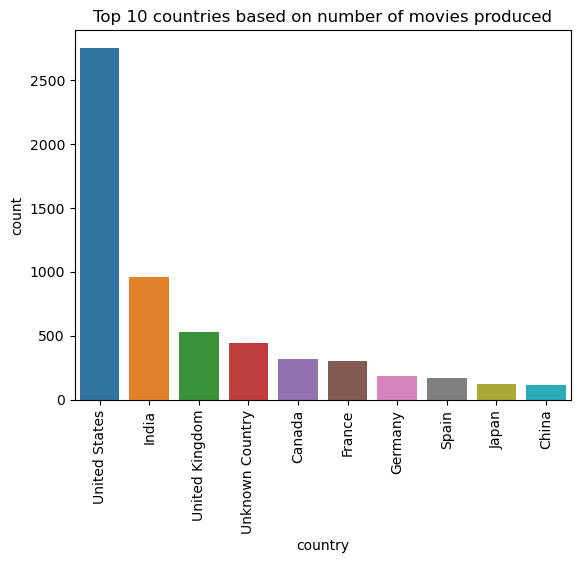

In [186]:
# Below graphical analysis shows that most of the movies are produced in Unites States, 
# which is same as present in the non-graphical analysis above

sns.countplot(x='country_split', data=df_top10_country_movie, order= df_top10_country_movie['country_split'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top 10 countries based on number of movies produced')
plt.xlabel('country')
plt.show()

# REQ-2b: Find the number of TV Shows produced in each country and pick the top 10 countries.

In [80]:
df_country_show = df_merged.loc[df_merged['type']=='TV Show',['show_id','country_split']]
df_country_show.drop_duplicates(inplace=True, keep='first')
df_top10_index = df_country_show['country_split'].value_counts().index[:10]
df_top10_country_show = df_country_show.loc[df_country_show['country_split'].isin(df_top10_index)]
df_top10_country_show

,show_id,country_split
58,s3,Unknown Country
85,s4,Unknown Country
87,s5,India
111,s6,Unknown Country
313,s9,United Kingdom
...,...,...
186045,s8796,Canada
186099,s8798,United States
186100,s8798,France
186101,s8798,South Korea


In [189]:
df_country_show.groupby('country_split')['show_id'].nunique().sort_values(ascending=False).head(10)

country_split
United States      938
Unknown Country    391
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: show_id, dtype: int64

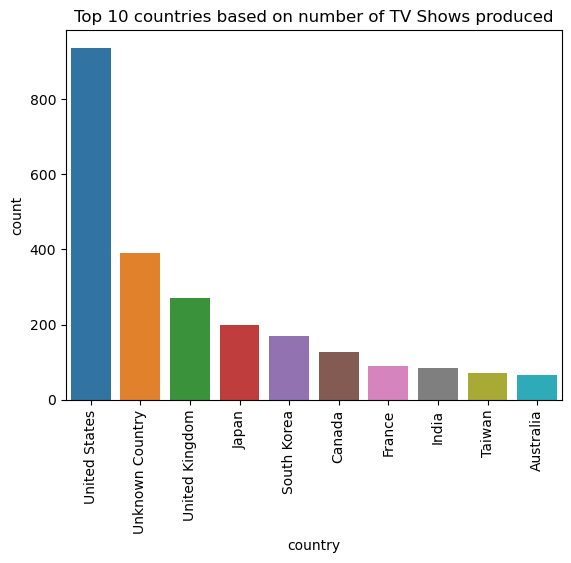

In [192]:
# Below graphical analysis shows that most of the TV Shows are produced in Unites States, 
# which is same as present in the non-graphical analysis above

sns.countplot(x='country_split', data=df_top10_country_show, order= df_top10_country_show['country_split'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top 10 countries based on number of TV Shows produced')
plt.xlabel('country')
plt.show()

# REQ-3a:  Find which is the best WEEK to release the Movie/TV Show:

In [194]:
df_netflix['week'] = df_netflix['date_added'].dt.isocalendar().week
df_netflix.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast_split,country_split,listed_in_split,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,United States,Documentaries,38
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,38
2,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,38
3,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,38
4,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,38


<!-- Analysis for Movies and Week -->

In [208]:
# Below analysis shows that 1st week is the best week to launch movies on Netflix
df_movie= df_netflix.loc[df_netflix['type']=='Movie']
df_best_week_movie = df_movie.groupby('week')['show_id'].nunique().sort_values(ascending=False)
df_best_week_movie = df_best_week_movie.reset_index()
df_best_week_movie.head()

,week,show_id
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195


<!-- Below graphical analysis shows that most the movies are produced in 1st week of the year as confirmed from non-graphical analysis as well -->
<!-- However, there is no specific trend-->
<!-- But since December is mostly the holiday month, we can have more number of movies lanuched in last 3 weeks of December to have more audience -->

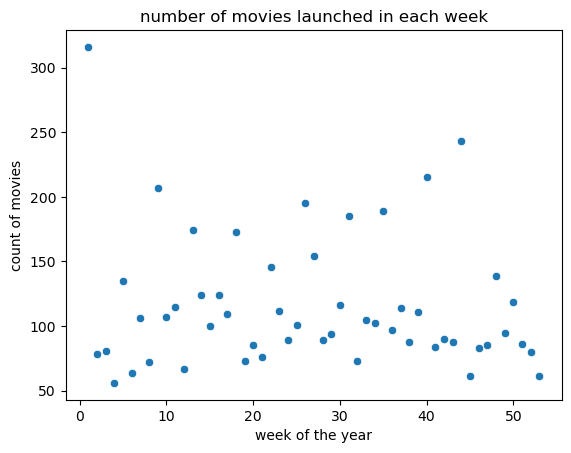

In [196]:
sns.scatterplot(x= 'week',y ='show_id', data=df_best_week_movie)
plt.title('number of movies launched in each week')
plt.ylabel('count of movies')
plt.xlabel('week of the year')
plt.show()

<!-- Analysis for TV Shows and Week -->

In [197]:

df_tvshow= df_netflix.loc[df_netflix['type']=='TV Show']
df_best_week_tvshow = df_tvshow.groupby('week')['show_id'].nunique().sort_values(ascending=False)
df_best_week_tvshow = df_best_week_tvshow.reset_index()
df_best_week_tvshow.head()

,week,show_id
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75


<!--# Below analysis shows that 27th week is the best week to launch TV Show on Netflix as confirmed from non-graphical analysis above as well. -->
<!-- However, there is no specfic trend for this as the numbers are very close to each other for other weeks as well -->

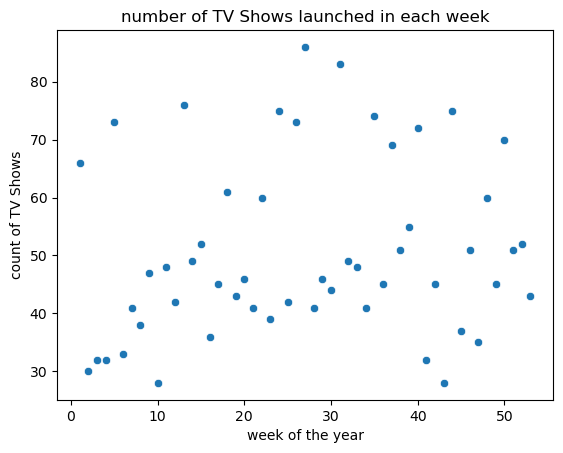

In [199]:
sns.scatterplot(x= 'week',y ='show_id', data=df_best_week_tvshow)
plt.title('number of TV Shows launched in each week')
plt.ylabel('count of TV Shows')
plt.xlabel('week of the year')
plt.show()

# REQ-3b: Find which is the best MONTH to release the Movie/TV Show:

In [201]:
df_netflix['month'] = df_netflix['date_added'].dt.month
df_netflix.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast_split,country_split,listed_in_split,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,United States,Documentaries,38,9
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,38,9
2,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,38,9
3,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,38,9
4,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,38,9


<!--Analysis for Movies and Month  -->

In [205]:
df_movie= df_netflix.loc[df_netflix['type']=='Movie']
df_best_month_movie = df_movie.groupby('month')['show_id'].nunique().sort_values(ascending=False)
df_best_month_movie = df_best_month_movie.reset_index()
df_best_month_movie.head()

,month,show_id
0,7,565
1,4,550
2,12,547
3,1,546
4,10,545


<!-- # Non-graphical analysis above and graphical analysis below shows that 7th Month is the best month to launch movies on Netflix -->
<!--Mostly in second half of the year, no. of movies released is more-->

<!--# Non-graphical Analysis above and graphical analysis below shows that 7th Month is the best month to launch movies on Netflix  -->

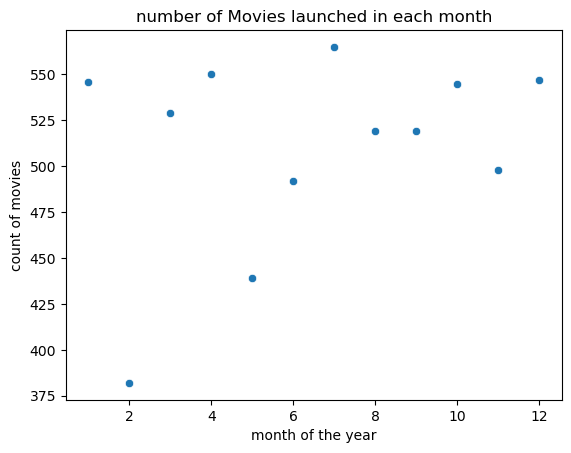

In [204]:
sns.scatterplot(x= 'month',y ='show_id', data=df_best_month_movie)
plt.title('number of Movies launched in each month')
plt.ylabel('count of movies')
plt.xlabel('month of the year')
plt.show()

<!--Analysis for TV Show and Month  -->

In [206]:
df_tvshow= df_netflix.loc[df_netflix['type']=='TV Show']
df_best_month_tvshow = df_tvshow.groupby('month')['show_id'].nunique().sort_values(ascending=False)
df_best_month_tvshow = df_best_month_tvshow.reset_index()
df_best_month_tvshow.head()

,month,show_id
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236


<!--# Non-graphical analysis above and graphical analysis below shows that 12th Month is the best month to launch TV Shows on Netflix  -->

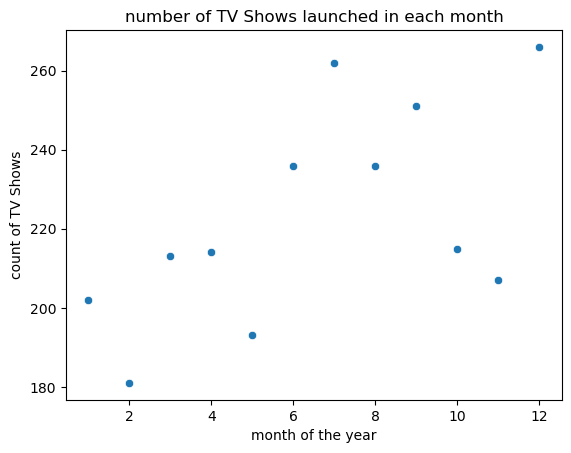

In [207]:
sns.scatterplot(x= 'month',y ='show_id', data=df_best_month_tvshow)
plt.title('number of TV Shows launched in each month')
plt.ylabel('count of TV Shows')
plt.xlabel('month of the year')
plt.show()

# REQ-4a: Identify the top 10 ACTORS who have appeared in most movies or TV shows

In [233]:
df_actors = df_netflix.groupby('cast_split')['show_id'].nunique().sort_values(ascending=False)
df_actors= df_actors.reset_index().head(10)
df_actors

,cast_split,show_id
0,Unknown Actor,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


<!--Since the count of missing data for actors is more than the actors present, 
there is a huge gap in the counts for the same.-->
<!--From the available data, it is observed that Anupam Kher has acted in most Movies/TV shows. -->

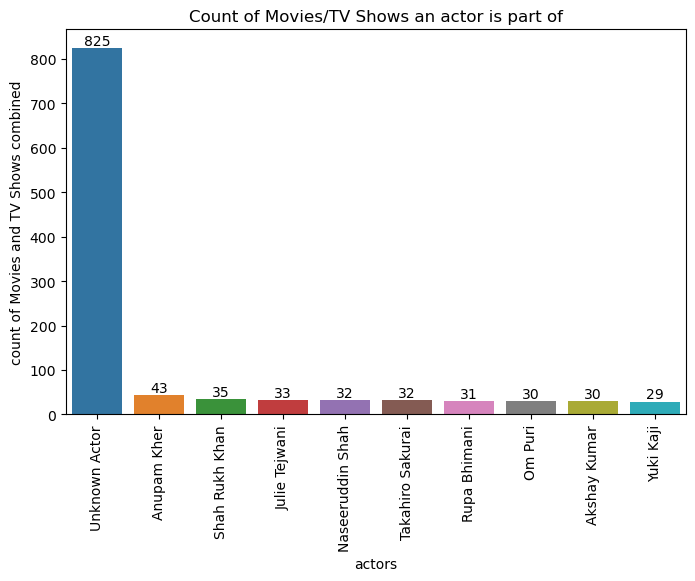

In [215]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='cast_split',y='show_id', data= df_actors)
plt.title('Count of Movies/TV Shows an actor is part of')
plt.xlabel('actors')
plt.ylabel('count of Movies and TV Shows combined')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# REQ-4b: Identify the top 10 DIRECTORS who have appeared in most movies or TV shows

In [218]:

df_directors = df_netflix.groupby('director')['show_id'].nunique().sort_values(ascending=False)
df_directors = df_directors.reset_index().head(10)
df_directors

,director,show_id
0,Unknown Director,2634
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


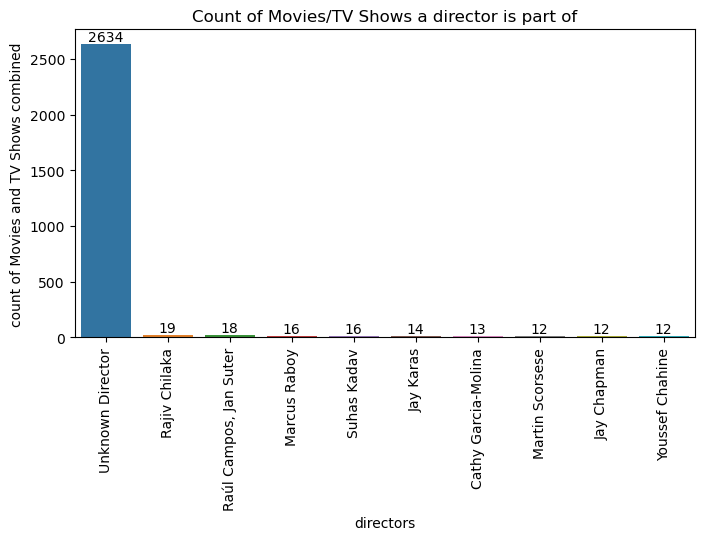

In [224]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='director',y='show_id', data= df_directors)
plt.title('Count of Movies/TV Shows a director is part of')
plt.xlabel('directors')
plt.ylabel('count of Movies and TV Shows combined')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# REQ-5: Which genre movies are more popular or produced more
# Wordcloud

In [235]:
# Get all movie genre for all shows (removing duplicates)
df_movies = df_netflix.loc[df_netflix['type']=='Movie',['show_id','listed_in_split']]
df_movies = df_movies.drop_duplicates()


<!-- # The word cloud below shows that movies with genre International Movies are produced more amongst all. -->

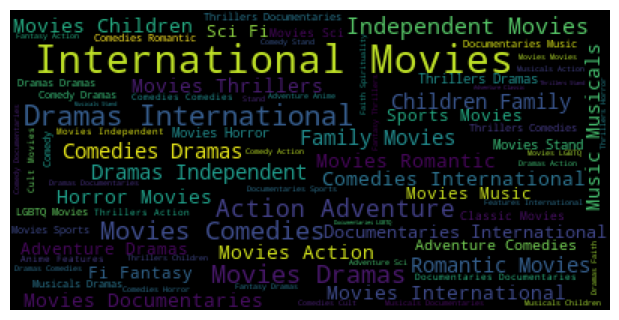

In [236]:
wordcloud = WordCloud().generate(' '.join(df_movies['listed_in_split']))
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Req-6: Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [237]:
# function to take release year as input and add day and month to it to create full date
def generate_date(year):
    new_date = str(year)+ '-01-01'
    return new_date


In [244]:
# call the above function to add the new release date column to the dataframe
# we are assuming the 
df_movie = df.loc[df['type']=='Movie']
df_movie['new_release_date'] = df_movie['release_year'].map(lambda x: generate_date(x)) 
df_movie['new_release_date'] = pd.to_datetime(df_movie['new_release_date'])
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_release_date,days_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-01,633 days
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-01-01,266 days
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993-01-01,10493 days
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-01-01,266 days
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-01-01,265 days


In [245]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   show_id           6131 non-null   object         
 1   type              6131 non-null   object         
 2   title             6131 non-null   object         
 3   director          6131 non-null   object         
 4   cast              6131 non-null   object         
 5   country           6131 non-null   object         
 6   date_added        6131 non-null   datetime64[ns] 
 7   release_year      6131 non-null   int64          
 8   rating            6131 non-null   object         
 9   duration          6131 non-null   object         
 10  listed_in         6131 non-null   object         
 11  description       6131 non-null   object         
 12  new_release_date  6131 non-null   datetime64[ns] 
 13  days_diff         6131 non-null   timedelta64[ns]
dtypes: datet

In [246]:
df_movie['days_diff'] = df_movie['date_added'] - df_movie['new_release_date']
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_release_date,days_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-01,633 days
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-01-01,266 days
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993-01-01,10493 days
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-01-01,266 days
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-01-01,265 days


In [247]:
df_movie['days_diff'].mode()

0   334 days
Name: days_diff, dtype: timedelta64[ns]

<!-- From the data above, it is observed that movies are launched on Netflix generally after 11 months. -->
<!-- Also, from data below, it is observed that mostly the movies are added on Netflix within a year or two -->

In [250]:
df_movie['days_diff'].value_counts().head(10)

334 days    29
546 days    28
424 days    26
365 days    23
639 days    22
486 days    20
485 days    20
379 days    19
304 days    19
348 days    19
Name: days_diff, dtype: int64

# REQ-7: How has the number of movies released per year changed over the last 20-30 years?

In [251]:
movie_counts = df.groupby('release_year')['show_id'].nunique().sort_values(ascending=False)
movie_counts

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: show_id, Length: 74, dtype: int64

In [252]:
df_release_year = df.loc[df['release_year']>df['release_year'].max()-30, ['show_id','type','title','date_added','release_year']]
df_release_year.describe()

,release_year
count,8517.000000
mean,2015.410473
std,5.413861
min,1992.000000
25%,2014.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


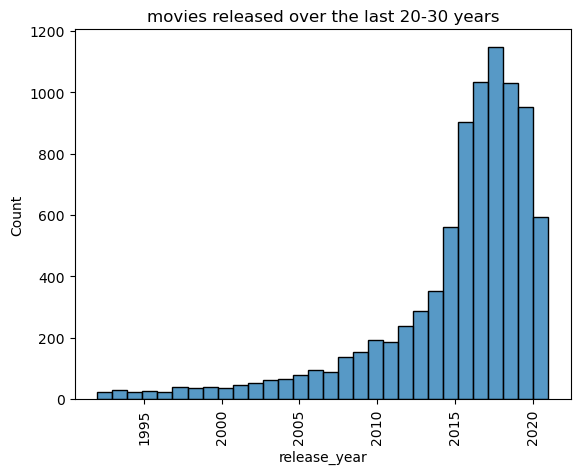

In [256]:
# analysis through histogram
sns.histplot(df_release_year['release_year'], bins=30)
plt.title('movies released over the last 20-30 years')
plt.xticks(rotation=90)
plt.show()

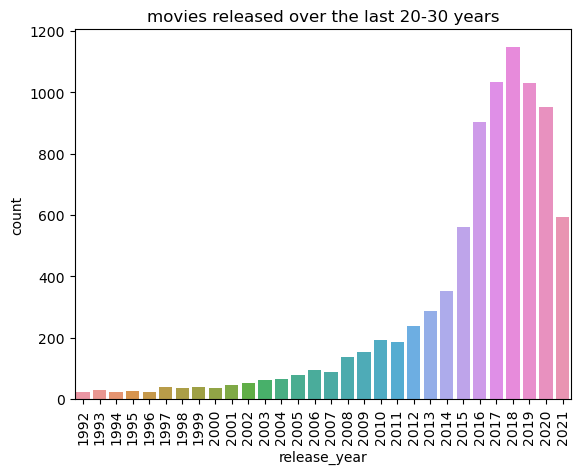

In [254]:
# analysis through countplot
sns.countplot(data=df_release_year, x='release_year')
plt.xticks(rotation=90)
plt.title('movies released over the last 20-30 years')
plt.show()

# 2020-2021 being the covid year, the number of movies released has declined quite a bit.

# REQ-8: Comparison of tv shows vs. movies.

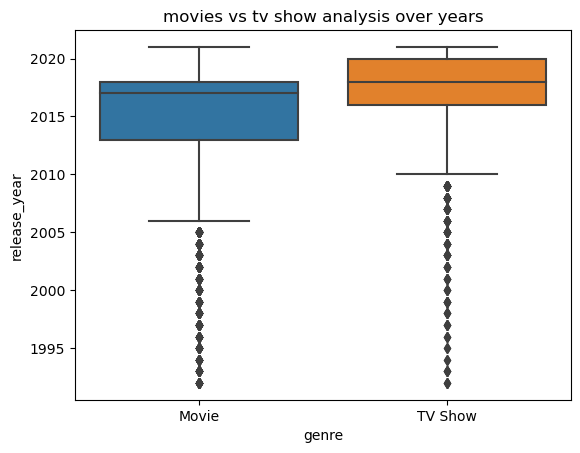

In [258]:
sns.boxplot(x='type', y='release_year', data=df_release_year)
plt.title('movies vs tv show analysis over years')
plt.xlabel('genre')
plt.show()
# The number of movies/tv shows released before 2012 is way less compared to 2012 and above.
# Also, looking at the plot, it shows that tv shows are being more favored by the audience 
# so Netflix is focusing much on tv shows now.